<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/Scale/S04_GeoPandas_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03 Scale**  GeoPandas Exercise - Answer Key

```
    Class       ARCH 6131 Urban Design Methods / Skills / Tools 1
                The Gensler Family AAP NYC Center
                Fall 2023
                Monday 3:30 PM to 6 PM

    Instructor  Brian Ho
                brian@brian-ho.io
```

This notebook serves as an exercise to practice some of the key technique using GeoPandas for GIS. It assumes you've completed the similar exerciss in the "Basic Python Data Structures" notebook. If you haven't — please complete that beforehand!

## Part 0 A Warm-Up
The following is meant to get you started and set up in this notebook. It also serves as a brief refresher on some key concepts. If you don't have the buildings data, please get it [here](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/buildings.geojson).

In [1]:
# Connect to Google Drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Install some additional libraries
!pip install geoplot --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 32.6 MB/s eta 0:00:00


In [5]:
# Import your dependencies
import geopandas as gpd
import pandas as pd
import geoplot

In [17]:
# Don't forget to re-name the variable below!
BUILDINGS_FILE_PATH = "/content/drive/MyDrive/Cornell AAP - MSAUD/ARCH 6131/Example Data/buildings.geojson"

In [18]:
# Load in the data
buildings_gdf = gpd.read_file(BUILDINGS_FILE_PATH)
nyc_boroughs_gdf = gpd.read_file(geoplot.datasets.get_path("nyc_boroughs"))

In [19]:
# You can quickly take a look at the data using GeoDataFrame.head()
nyc_boroughs_gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [20]:
# You can also iterate over the rows in a loop using GeoDataFrame.iterrows()
for i, row in nyc_boroughs_gdf.iterrows():
    print(f"The {i}th row is {row['BoroName']}")

The 0th row is Staten Island
The 1th row is Queens
The 2th row is Brooklyn
The 3th row is Manhattan
The 4th row is Bronx


In [21]:
# As a reminder, when you load data into a GeoDataFrame you can get a number of helpful attributes.
# For example, you can get the number of columns and rows.
print(f'There are {len(nyc_boroughs_gdf)} rows in the "nyc_boroughs_gdf" dataset.')
print(
    f"There are {len(nyc_boroughs_gdf.columns)} columns: {nyc_boroughs_gdf.columns.tolist()}"
)
print(f"This means it has a shape of {nyc_boroughs_gdf.shape}")

There are 5 rows in the "nyc_boroughs_gdf" dataset.
There are 5 columns: ['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry']
This means it has a shape of (5, 5)


The max is: 3049947236.73
The min is: 636442167.467
The mean is: 1691295807.1454
The median is: 1623853249.91


<Axes: ylabel='Frequency'>

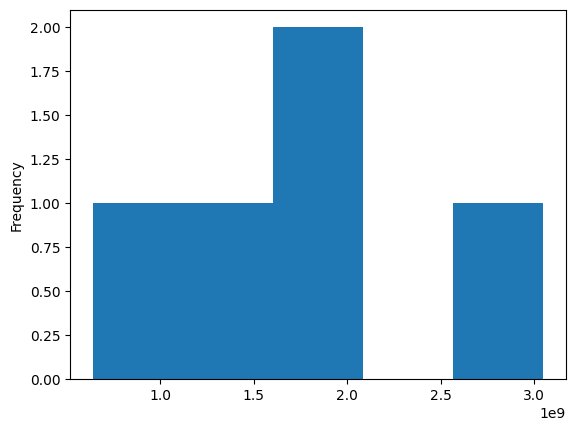

In [22]:
# We can get some statistical summaries
print(f"The max is: {nyc_boroughs_gdf['Shape_Area'].max()}")
print(f"The min is: {nyc_boroughs_gdf['Shape_Area'].min()}")
print(f"The mean is: {nyc_boroughs_gdf['Shape_Area'].mean()}")
print(f"The median is: {nyc_boroughs_gdf['Shape_Area'].median()}")

# We can get some basic plots too!
nyc_boroughs_gdf["Shape_Area"].plot.hist(bins=5)

<Axes: xlabel='Shape_Area', ylabel='Shape_Leng'>

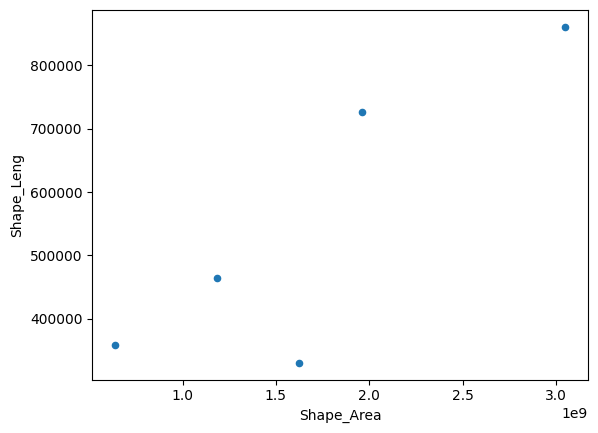

In [23]:
# We can get some other plots with multiple columns
nyc_boroughs_gdf.plot.scatter("Shape_Area", "Shape_Leng")

<Axes: >

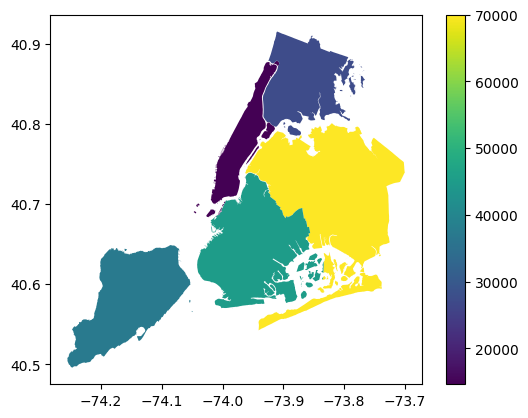

In [24]:
# You can even add columns and plot them as choropleth maps.
nyc_boroughs_gdf["Shape_Area_Acres"] = (
    nyc_boroughs_gdf["Shape_Area"] / 43_560
)  # square feet per acre
nyc_boroughs_gdf.plot(column="Shape_Area_Acres", legend=True)

In [25]:
# You can also do basic filters using the [] syntax
b_boroughs_gdf = nyc_boroughs_gdf[nyc_boroughs_gdf["BoroName"].str.startswith("B")]
b_boroughs_gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Shape_Area_Acres
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",44982.374583
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",27245.274215


In [26]:
# Or more complex ones
# First, we'll conver to a local projection https://epsg.io/2263
nyc_boroughs_feet_gdf = nyc_boroughs_gdf.to_crs(2263)
nyc_boroughs_feet_gdf[nyc_boroughs_feet_gdf["geometry"].area > 2_000_000_000]

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Shape_Area_Acres
1,4,Queens,861038.4793,3.049947e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",70017.154195


In [27]:
# You can also use functions that operate on each value in a column, using apply()
def make_short_name(borough_name):
    return borough_name[0]


# THis applies the function make_short_name() to each value in the "BoroName" column
nyc_boroughs_gdf["Short_Name"] = nyc_boroughs_gdf["BoroName"].apply(make_short_name)
nyc_boroughs_gdf[["BoroName", "Short_Name"]]

,BoroName,Short_Name
0,Staten Island,S
1,Queens,Q
2,Brooklyn,B
3,Manhattan,M
4,Bronx,B


In [28]:
# You can also use functions that operate on entire rows and across multiple columns
def make_long_name(borough):
    return f"{borough['BoroName']} - Code {borough['BoroCode']}"


# This applies the function make_long_name() to each row
# The axis=1 argument meands the apply() function operates on row
nyc_boroughs_gdf["Long_Name"] = nyc_boroughs_gdf.apply(make_long_name, axis=1)
nyc_boroughs_gdf[["BoroName", "BoroCode", "Long_Name"]]

,BoroName,BoroCode,Long_Name
0,Staten Island,5,Staten Island - Code 5
1,Queens,4,Queens - Code 4
2,Brooklyn,3,Brooklyn - Code 3
3,Manhattan,1,Manhattan - Code 1
4,Bronx,2,Bronx - Code 2


<Axes: >

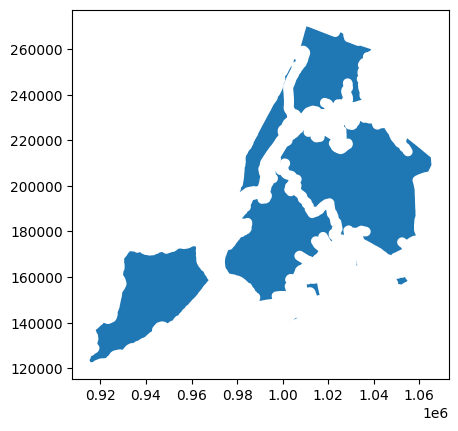

In [29]:
# There are a number of geometry operations you can do too!
def make_smaller(geom):
    return geom.buffer(-2000)


# First, let's make a copy of the GeoDataFrame
nyc_boroughs_in_feet_gdf = nyc_boroughs_gdf.copy()

# Again, we'll project it to a local CRS
nyc_boroughs_in_feet_gdf = nyc_boroughs_in_feet_gdf.to_crs(2263)

# Then apply our function to the "geommetry" column
nyc_boroughs_in_feet_gdf["geometry"] = nyc_boroughs_in_feet_gdf["geometry"].apply(
    make_smaller
)
nyc_boroughs_in_feet_gdf.plot()

In [30]:
# We can check the number of each value
nyc_boroughs_gdf["Short_Name"].value_counts()

B    2
S    1
Q    1
M    1
Name: Short_Name, dtype: int64

In [31]:
# Finally, you can filter out specific row(s)
bronx = nyc_boroughs_gdf[nyc_boroughs_gdf["BoroName"] == "Bronx"]
bronx

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,Shape_Area_Acres,Short_Name,Long_Name
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",27245.274215,B,Bronx - Code 2


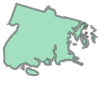

In [32]:
# And get specific values from them
bronx_geom = bronx["geometry"].values[0]
bronx_geom

<Axes: >

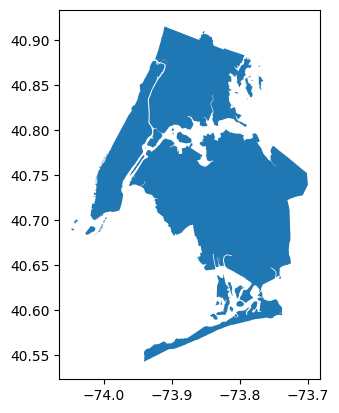

In [33]:
# A spatial join should gives interesting results — why would thiis include Queens and Manhattan?
join_gdf = nyc_boroughs_gdf.sjoin(bronx)
join_gdf.plot()

<Axes: >

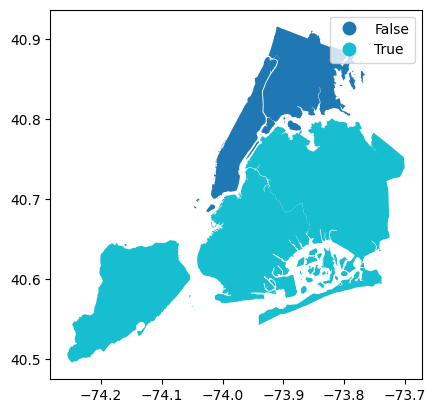

In [34]:
# ... and which also enables more interesting analysis
def is_larger_than_bronx(borough):
    return borough["geometry"].area > bronx_geom.area


nyc_boroughs_gdf["Bigger_Than_Bronx"] = nyc_boroughs_gdf.apply(
    is_larger_than_bronx, axis=1
)
nyc_boroughs_gdf.plot(column="Bigger_Than_Bronx", legend=True)

## Part 1: The Basics
Complete the following using the `buildings_gdf` dataset. If you don't have the buildings data, please get it [here](https://github.com/brian-ho/intro-to-urban-data/blob/main/example_data/buildings.geojson).

1. How many buildings are in the `buildings_gdf` dataset?

In [35]:
print(f"There are {len(buildings_gdf)} buildings.")

There are 11868 buildings.



2. How many columns are there in the `buildings_gdf` dataset?

In [38]:
print(f"There are {buildings_gdf.shape[1]} columns.")

There are 8 columns.


3.  Print all the names of the columns in `buildings_gdf`.

In [40]:
for col in buildings_gdf.columns.tolist():
    print(col)

base_bbl
cnstrct_yr
doitt_id
groundelev
heightroof
mpluto_bbl
name
geometry


## Part 2: Summaries
4. Compute the  height of each building in `buildings_gdf`, adding it as a column to the dataframe.

In [44]:
# A secret trick quesiton!
# buildings_gdf['heightroof'] is the height column per the original dataset
# See https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md#2-data-quality-and-specifications

5. Find the height of the tallest building in `buildings_gdf`.

In [47]:
print(f'The tallest buildinngs is {buildings_gdf["heightroof"].max()} feet.')

The tallest buildinngs is 1408.377901 feet.


6. Find the height of the building with the lowest ground elevation in `buildings_gdf`.

In [51]:
lowest_ground_elevation = buildings_gdf["groundelev"].min()
height = buildings_gdf[buildings_gdf["groundelev"] == lowest_ground_elevation][
    "heightroof"
].values[0]

print(f"The height of the building with the lowest ground elevation is {height} feet.")

The height of the building with the lowest ground elevation is 132.46595151 feet.


7. Estimate the volume of each buliding as its height times its area. You'll need to conver your buildings to be in feet, not degrees. Add the volume as a column to the `buildings_gdf`.

<Axes: >

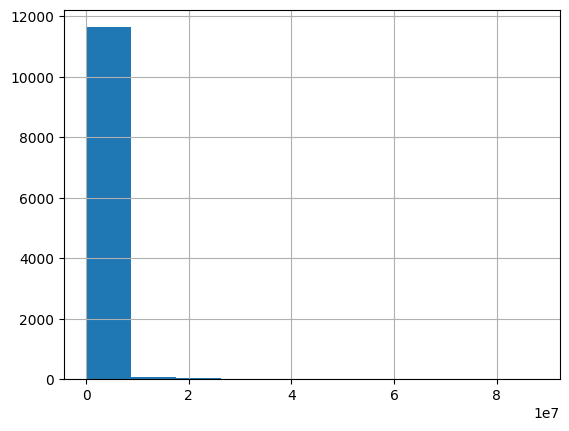

In [52]:
buildings_gdf_converted = buildings_gdf.to_crs(2263)
buildings_gdf_converted["area"] = buildings_gdf_converted["geometry"].area
buildings_gdf_converted["volume"] = (
    buildings_gdf_converted["area"] * buildings_gdf_converted["heightroof"]
)

buildings_gdf_converted["volume"].hist(bins=10)

8. Find the mean (average) and median volume of all buildings.

In [53]:
print(f'The mean volume is {buildings_gdf_converted["volume"].mean()}')
print(f'The median volume is {buildings_gdf_converted["volume"].median()}')

The mean volume is 567986.463149966
The median volume is 104363.10577937431


## Part 3: Operations
9. Extract the geometry for the borough of Manhattan from `nyc_boroughs_gdf`.

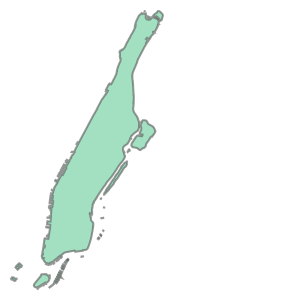

In [56]:
nyc_boroughs_gdf_converted = nyc_boroughs_gdf.to_crs(2263)

manhattan_geom = nyc_boroughs_gdf_converted[
    nyc_boroughs_gdf_converted["BoroName"] == "Manhattan"
]["geometry"].values[0]
manhattan_geom

10. Buffer the geometry in by 100 feet — so that it is smaller. What is its area?

In [69]:
buffered_manhattan_geom = manhattan_geom.buffer(-100)
print(f"Buffered-in area is {buffered_manhattan_geom.area}")

Buffered-in area is 607256989.2386044


11. Using the buffered (smaller) geometry for Manhattan, create a GeoDataFrame with a single row.

In [72]:
buffered_manhattan_gdf = gpd.GeoDataFrame(geometry=[buffered_manhattan_geom], crs=2263)

12. Create a spatial join to extract all the buildings in `buildings_gdf` that are in your buffered (smaller) geometry for Manhattan.

<Axes: >

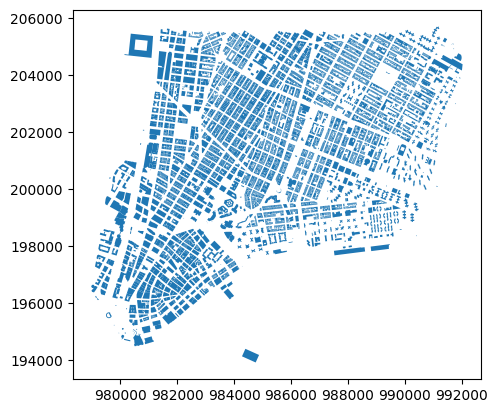

In [83]:
buildings_in_manhattan = buildings_gdf_converted.sjoin(buffered_manhattan_gdf)

buildings_in_manhattan.plot()

13. Plot the histogram for the height of all the buildings in your buffered (smaller) geometry for Manhattan.

<Axes: >

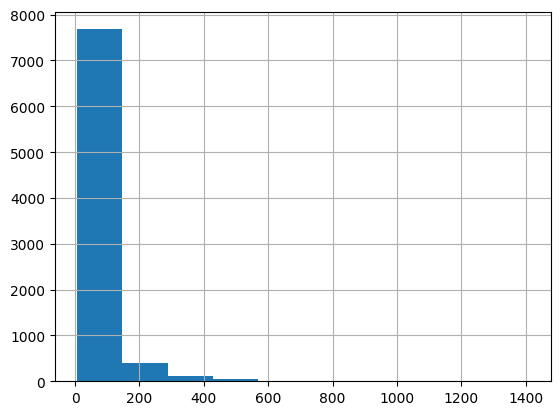

In [79]:
buildings_in_manhattan["heightroof"].hist()

14. Plot a scatterplot with the ground elevation as the X-axis and the total height as the Y-axis.

<Axes: xlabel='groundelev', ylabel='heightroof'>

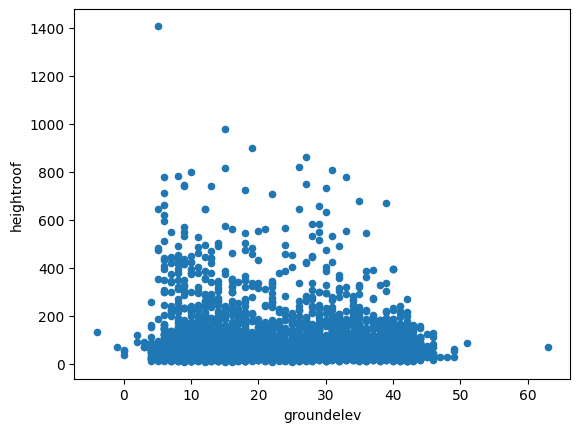

In [82]:
buildings_in_manhattan.plot.scatter("groundelev", "heightroof")

That's it! Save the resulting GeoJSON to your Google Drive to submit later.

## Optional Challenge!
If you'd like to preview some of next week's material, try using `apply` functions. Can you write and apply a function that takes a building and checks if:
- Its ground elevation is higher than 10 feet
- Its total height is more than 50 feet
- Its footprint area is larger than 1,000 square feet
- It is _not_ contained in Manhattan

In [89]:
def my_apply_function(building_row):
    if (
        building_row["groundelev"] > 10
        and building_row["heightroof"] > 50
        and building_row["geometry"].area > 1e3
        and not building_row["geometry"].intersects(manhattan_geom)
    ):
        return True
    else:
        return False

Now that you have that function, apply it to the `buildings_gdf` dataframe. Can you filter the results to just those that match?

<Axes: >

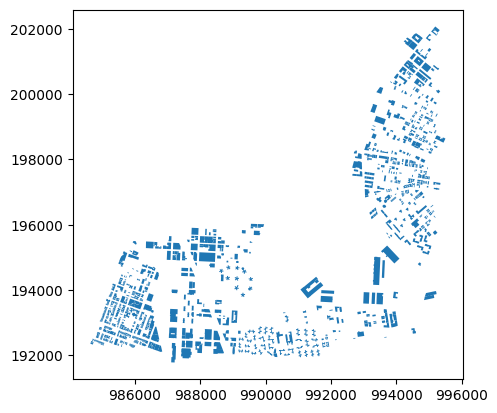

In [90]:
msk = buildings_gdf_converted.apply(my_apply_function, axis=1)
final_gdf = buildings_gdf_converted[msk]
final_gdf.plot()

If you made it this far, save a separate GeoJSON to your Google Drive to submit later!

In [92]:
final_gdf.to_crs(4326).to_file("results.geojson", driiver="GeoJSON")